# Assignment - 1
Group No: 22; 
Deep Singh     251122489,
Mandeep Singh  251122474,
Sanket Salunke 251102392

#### Dependencies
First of all, we will import the libraries for the basic requirements such as mathematical calculations, plotting graphs, data visualization, etc and then we will import question specific libraries.

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

import datetime                                  #Q10
import tracemalloc 

import scipy.stats as stats

from glob import glob                             #Q1

from sklearn.feature_selection import SelectKBest #Q2
from sklearn.feature_selection import chi2
from sklearn import preprocessing

from scipy.stats import norm                      #Q3
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA             #Q3c
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

from scipy.stats import multivariate_normal       #Q5

from sklearn.metrics import f1_score              #Q6
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split # Q8
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 

from sklearn.cluster import KMeans #Q9

from numpy.random import seed

%matplotlib inline

# Data Preparation

In [68]:
path = r'C:\Users\dpsin\GitHub\ECE9039_Assignment1\Normal_Experiments' #specifying path
all_files = glob(path + "/*.csv")                                      #use glob function to create wildcard for all file names
li = []                                                                #empty list to store file 
for filename in all_files:                                             #read all files using iteration
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)                                                      
frame = pd.concat(li, axis=0, ignore_index=True)                       #merge files into one
frame.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Sds_Armed,Anomaly_Tag
0,0.006286,0.011072,0.088714,0.036855,0.12677,0.22329,1.7891,0.74325,0,0
1,0.008937,0.015274,0.119970,0.051323,0.18024,0.30803,2.4193,1.03500,0,0
2,0.012156,0.019694,0.150640,0.064529,0.24514,0.39717,3.0379,1.30130,0,0
3,0.015202,0.024273,0.179940,0.075763,0.30658,0.48950,3.6288,1.52790,0,0
4,0.017572,0.028237,0.208750,0.087763,0.30470,0.48138,3.6888,1.55960,0,0


In [69]:
index = frame[frame['Sds_Armed'] == 0].index                                #find rows with SDs_Armed=0
frame.drop(index, inplace = True)                                           #drop rows with SDs_Armed=0
# Export merged file to local directory with name 'merged_exp_normal.csv'
frame.to_csv(r'C:\Users\dpsin\GitHub\ECE9039_Assignment1\merged_exp_normal.csv') #export file

#verify Sds_armed=1
frame.head()                                                                     #verify remaining data for SDs_Armed=1

,X1,X2,X3,X4,X5,X6,X7,X8,Sds_Armed,Anomaly_Tag
622,0.42051,0.73265,6.0160,1.4258,0.22390,0.44638,4.9892,1.3106,1,0
623,0.41743,0.72691,6.0102,1.4259,0.21750,0.44326,5.0469,1.3243,1,0
624,0.41608,0.72337,6.0093,1.4254,0.21875,0.44661,5.0830,1.3227,1,0
625,0.41517,0.72154,6.0002,1.4261,0.23488,0.46345,4.9672,1.3509,1,0
626,0.41376,0.71773,5.9814,1.4257,0.25363,0.48208,4.8346,1.3580,1,0


In [70]:
# Read all 'Experiments_with_Anomalies' files
path = r'C:\Users\dpsin\GitHub\ECE9039_Assignment1\Experiments_with_Anomalies' #specifying path
all_files = glob(path + "/*.csv")                                              #use glob function to create wildcard for all file names
li = []                                                                        #empty list to store file 

# Merge all 'Experiments_with_Anomalies' files into one merged file
for filename in all_files:                                                     #read all files using iteration
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)                                                      
frame = pd.concat(li, axis=0, ignore_index=True)                               #merge files into one
index = frame[frame['Sds_Armed'] == 0].index                                   #find rows with SDs_Armed=0
frame.drop(index, inplace = True)                                              #drop rows with SDs_Armed=0
frame.to_csv(r'C:\Users\dpsin\GitHub\ECE9039_Assignment1\merged_exp_contains_anomalies.csv') #export file

In [71]:
#verify Sds_armed=1
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45626 entries, 745 to 324847
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X1           45626 non-null  float64
 1   X2           45626 non-null  float64
 2   X3           45626 non-null  float64
 3   X4           45626 non-null  float64
 4   X5           45626 non-null  float64
 5   X6           45626 non-null  float64
 6   X7           45626 non-null  float64
 7   X8           45626 non-null  float64
 8   Sds_Armed    45626 non-null  int64  
 9   Anomaly_Tag  45626 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 3.8 MB


###### Preparing dataset

In [72]:
#Anomalous Dataset
dfa = pd.read_csv("merged_exp_contains_anomalies.csv")
dfa = dfa.drop(dfa.columns[[0,9]], axis = 1)

#Normal Dataset
dfn = pd.read_csv("merged_exp_normal.csv")
dfn = dfn.drop(dfn.columns[[0,9]], axis = 1)

In [73]:
dfa.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Anomaly_Tag
0,1.7957,6.1964,508.57,875.40,0.43922,1.5473,57.021,56.914,0
1,1.7851,6.1508,503.90,867.18,0.43947,1.3525,53.658,58.856,0
2,1.7760,6.1173,499.62,860.56,0.42528,1.3391,52.551,69.101,0
3,1.7641,6.0799,494.07,851.51,0.42802,1.3679,51.228,75.935,0
4,1.7525,6.0333,486.73,840.86,0.40701,1.3128,47.228,72.784,0


In [74]:
def scale(x):
    scaler = preprocessing.MinMaxScaler()
    df=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
    return df

In [75]:
#Seperating features and targets
X_a = dfa.iloc[:,0:8]                #Features columns for anomalous
Y_a = pd.DataFrame(dfa.iloc[:,-1])   #target column for anomalous
Xascaled = scale(X_a)
Yascaled = scale(Y_a)

X_n = dfn.iloc[:,0:8]                #Features columns for normal
Y_n = pd.DataFrame(dfn.iloc[:,-1])   #target column for normal

# Building A Statistical-Based Anomaly Detection Algorithm

In [76]:
#features ranking using selectkbest
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(Xascaled,Yascaled)

dfscores = pd.DataFrame(fit.scores_) #generate feature score
dfcolumns = pd.DataFrame(Xascaled.columns)  #extract feature name

#combine rank and feature name
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #Headings

print(featureScores.nlargest(8,'Score'))  #print score

  Specs       Score
0    X1  386.284336
4    X5  230.132040
5    X6   93.807420
7    X8   35.280817
3    X4   25.000674
2    X3   24.248911
1    X2   18.565281
6    X7    0.255630


In [77]:
# Generating Mean and Standard Deviation
def para(x):
    mu=np.mean(x)
    sigma=np.std(x)
    var=np.var(x)
    return mu,sigma,var

### a. Consider all features (X1 to X8)

In [78]:
# Mean and standard deviation for Normal Dataset
mu_n,sigma_n,var_n=para(X_n)
print("mu:",mu_n,"\n", "\n","var:",var_n)

mu: X1    0.497500
X2    0.883802
X3    7.763045
X4    2.617440
X5    0.477496
X6    0.849776
X7    7.395009
X8    2.546401
dtype: float64 
 
 var: X1      0.237125
X2      0.979342
X3    193.223099
X4     12.015144
X5      0.608143
X6      2.467858
X7    330.799533
X8     22.105024
dtype: float64


In [79]:
pdf_n=norm.pdf(X_n,mu_n,var_n)

In [80]:
print('pdfmin: ',pdf_n.min(), ",pdfmax: ",pdf_n.max())

pdfmin:  0.0 ,pdfmax:  1.6824127378324365


### b. Mark the most important two features
Feature X1 and X5 are most important feature as per score obtained in question 3

#### X1  386.284336
#### X5  230.132040

In [81]:
#Generating PDF functions based on only important features X1 and X5
X15=X_n.drop(['X2','X3','X4','X6','X7','X8'], axis = 1)
mu15,sigma15,var15=para(X15)

In [82]:
pdf15=norm.pdf(X15,mu15,sigma15)

In [83]:
print('pdfmin: ',pdf15.min(), ",pdfmax: ",pdf15.max())

pdfmin:  0.0 ,pdfmax:  0.8192591618087527


### c. Projection of feature space into first two components using PCA

In [84]:
# fitting and transforming to principal components
pca = decomposition.PCA(n_components=2)
pca1 = pca.fit_transform(X_n)
pca1 =  pd.DataFrame(pca1)

pca2 = pca.fit_transform(X_a)
pca2 = pd.DataFrame(pca2)

#verifying the shape
pca2.shape

(45626, 2)

In [85]:
pca1=pd.concat([pca1,Y_n],axis=1)
pca1.columns=['PCA_Feature_1', 'PCA_Feature_2', 'Label']
pca2=pd.concat([pca2,Y_a],axis=1)
pca2.columns=['PCA_Feature_1', 'PCA_Feature_2', 'Label']

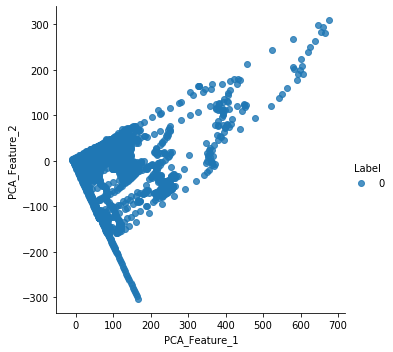

In [86]:
#projecting the feature space
sns.lmplot(x ='PCA_Feature_1', y='PCA_Feature_2', hue ='Label', data = pca1, fit_reg=False )
plt.show()

## Question 5 - Model the same normal process “merged exp normal.csv” using Gaussian distribution with all requirements in Question 4. However, assume that the features are dependent.

We will use co variance matrix to generate pdf functions for this case.

In [87]:
#getting covariance matrix
covariance=X_n.cov()
print("Covariance \n",covariance)

Covariance 
           X1        X2          X3         X4        X5         X6  \
X1  0.237127  0.469539    3.827697   1.283360  0.141805   0.280584   
X2  0.469539  0.979348    9.231350   2.875613  0.274458   0.581017   
X3  3.827697  9.231350  193.224368  42.086533  1.956296   5.183251   
X4  1.283360  2.875613   42.086533  12.015223  0.671428   1.567032   
X5  0.141805  0.274458    1.956296   0.671428  0.608147   1.190327   
X6  0.280584  0.581017    5.183251   1.567032  1.190327   2.467874   
X7  2.034031  5.073584  112.064358  22.959798  8.644799  19.680881   
X8  0.717838  1.619127   24.372733   6.651358  2.807354   6.138411   

            X7         X8  
X1    2.034031   0.717838  
X2    5.073584   1.619127  
X3  112.064358  24.372733  
X4   22.959798   6.651358  
X5    8.644799   2.807354  
X6   19.680881   6.138411  
X7  330.801704  75.317589  
X8   75.317589  22.105169  


In [88]:
#generating PDF function
pdfmv=multivariate_normal.pdf(X_n,mu_n,covariance)
print('pdfmin: ',pdfmv.min(), ",pdfmax: ",pdfmv.max())

pdfmin:  0.0 ,pdfmax:  0.00014047744565577936


## Anomaly Alarm

We will first split the anomaly dataset into test and train using train_test_split and then generate mean and standard deviation for the training set. Then threshold value will be calculated to use it to design the alarm.

In [89]:
#splitting dataset

features=dfa[['X1','X2','X3','X4','X5','X6','X7','X8']]
labels  =dfa['Anomaly_Tag']

x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2, random_state=42)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

### Designing Anomaly Alarm with Threshold Value/epsilon = 0.01

In [90]:
epsilon=0.01

In [91]:
#Parameters of Test Data (Mean, standard deviation, Covariance): x_test
mu_test,sigma_test,var_test=para(x_test)
cov_test=x_test.cov()

In [92]:
pdf_test = multivariate_normal.pdf(x_test,mu_test,cov_test)

In [93]:
def alarm(pdf,epsilon):
    outlier = (pdf>epsilon)
    f = f1_score(y_test, outlier, average = "micro")
    return outlier,f

In [94]:
outlier,f = alarm(pdf_test,epsilon)
print ('F1 Score', f)
# print(outlier.shape, outlier)

F1 Score 0.8619329388560159


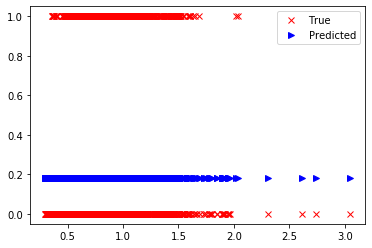

In [95]:
fig, ax = plt.subplots()
ax.plot(x_test['X1'], y_test, 'x', color='red',label='True')
ax.plot(x_test['X1'], (outlier+0.2)*0.9, '>', color='blue',label='Predicted')
leg = ax.legend()

### Question 1) Optimize the parameter  with the objective of maximizing the detection rate and minimizing the false alarm rate. Compare the results before and after optimizing. Consider the following objectives \jointly":
{ Reduce the number of generated false alarms.
{ Increase the number true anomalies discovered.

Finding threshold value

In [96]:
def getanomaly(x,y):
    a=pd.DataFrame(x)
    index = y[y['Anomaly_Tag'] == 0].index                                #find rows with SDs_Armed=0
    a.drop(index, inplace = True)                                           #drop rows with SDs_Armed=0
    return a

In [97]:
anomaly=getanomaly(x_test,y_test)

In [98]:
def threshold(y,pdf):
    epsilon,F1 = 0,0
    max=pdf.max()
#     min=pdf.min()
    min = 8.727682362147862e-63
    
    step=(max-min)/1000
    print('stepsize',step)

    for epi in np.arange(min,max,step):
        prediction = (pdf<epi)
        F = f1_score(y_train, prediction, average = "micro")
        if F > F1:
            F1 = F
            epsilon = epi
#     print ('Predictions:',prediction)
    print ('F1 Score', F1)
    print ('Epsilon', epsilon)    
    return epsilon, F1

In [99]:
#Mean and standard deviation for anomaly
mu_a,sigma_a,var_a=para(anomaly)
cov_a=anomaly.cov()

In [100]:
#PDF for anomaly
pdf_a=multivariate_normal.pdf(anomaly,mu_a,cov_a)
print('pdfmin: ',pdf_a.min(), ",pdfmax: ",pdf_a.max())

pdfmin:  8.727682362147862e-63 ,pdfmax:  7.050418111898926e-09


In [101]:
#Mean and standard deviation for anomaly
mu_tr,sigma_tr,var_tr=para(anomaly)
cov_tr=anomaly.cov()

In [102]:
#PDF for training set
pdf_tr=multivariate_normal.pdf(x_train,mu_tr,cov_tr)

In [103]:
epsilon,F1 =threshold(y_train,pdf_tr)

stepsize 7.240457888605732e-12
F1 Score 0.8318630136986301
Epsilon 8.727682362147862e-63


In [104]:
epsilon

8.727682362147862e-63

Testing with new epsilon

In [105]:
#Parameters of Test Data (Mean, standard deviation, Covariance): x_test
mu_test,sigma_test,var_test=para(x_test)
cov_test=x_test.cov()

In [106]:
pdf_test = multivariate_normal.pdf(x_test,mu_test,cov_test)

In [107]:
outlier = (pdf_test<epsilon)
# print ('F1 Score', f)
# print(outlier.shape, outlier)

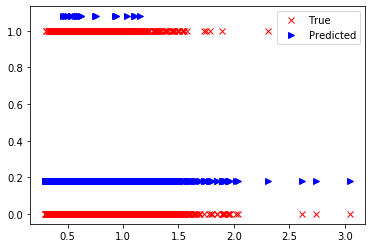

In [139]:
fig, ax = plt.subplots()
ax.plot(x_test['X1'], y_test, 'x', color='red',label='True')
ax.plot(x_test['X1'], (outlier+0.2)*0.9, '>', color='blue',label='Predicted')
leg = ax.legend()

Question 2) If the features in the Gaussian-based approach do not follow the Gaussian distribution,
apply a suitable transformation to make better suit the Gaussian shape. Compare the results before
and after the transformation [15 points].

In [109]:
# normalize the dataset
x_testscale = scale(x_test)
x_trainscale = scale(x_train)
x_testscale.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.099911,0.018631,0.011682,0.003193,0.090197,0.061230,0.051352,0.031503
1,0.152929,0.149852,0.149873,0.166082,0.061323,0.017469,0.003436,0.001082
2,0.132040,0.016043,0.029867,0.002255,0.056631,0.011700,0.020812,0.001742
3,0.056847,0.007011,0.003105,0.000635,0.029823,0.010812,0.003886,0.001080
4,0.029743,0.000546,0.012651,0.000745,0.024050,0.003972,0.009424,0.001245


In [110]:
#Mean and standard deviation for x_train
mu_tr,sigma_tr,var_tr=para(x_trainscale)
cov_tr=x_trainscale.cov()

In [111]:
#PDF for x_train
pdf_tr=multivariate_normal.pdf(x_trainscale,mu_tr,cov_tr)
m=np.sort(pdf_tr)

for i in range(len(m)):
    if m[i]>0:
        min=m[i]
        break

print('(pdfmin>0): ',min, ",pdfmax: ",pdf_tr.max())

(pdfmin>0):  5.5844e-320 ,pdfmax:  107350824.55648866


In [112]:
epsilon

8.727682362147862e-63

In [113]:
#Parameters of Test Data (Mean, standard deviation, Covariance): x_test
mu_test,sigma_test,var_test=para(x_testscale)
cov_test=x_testscale.cov()

In [114]:
pdf_test = multivariate_normal.pdf(x_testscale,mu_test,cov_test)

In [115]:
outlier = (pdf_test<epsilon)

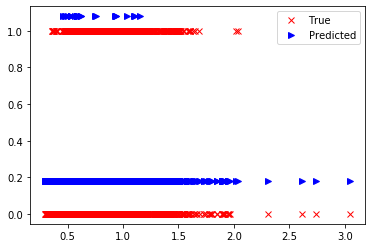

In [116]:
fig, ax = plt.subplots()
ax.plot(x_test['X1'], y_test, 'x', color='red',label='True')
ax.plot(x_test['X1'], (outlier+0.2)*0.9, '>', color='blue',label='Predicted')
leg = ax.legend()

--------------------------------------------------------------

Question 3) Implement an appropriate neural network architecture that is used for time-series data
to classify the events to normal and anomalies [40 points]. Compare the results with the statistical
based developed algorithm in Assignment 1 in terms of:
{ Detection capabilities (use the relevant metrics discussed in the class).
{ Time complexity and memory requirements during the training phase.
{ Time complexity and memory requirements during the execution phase.

#### Get anomalies

In [117]:
X_train, X_test, y_train, y_test = train_test_split(dfa, Y_a, test_size=0.2, random_state=123)

In [143]:
y_train['Anomaly_Tag'].value_counts()

0    31393
1     5107
Name: Anomaly_Tag, dtype: int64

In [119]:
def getanomaly(x):
    a=pd.DataFrame(x)
    index = a[a['Anomaly_Tag'] == 0].index                                #find rows with SDs_Armed=0
    a.drop(index, inplace = True)                                           #drop rows with SDs_Armed=0
    return a

In [120]:
def getnormal(x):
    a=pd.DataFrame(x)
    index = a[a['Anomaly_Tag'] == 1].index                                #find rows with SDs_Armed=0
    a.drop(index, inplace = True)                                           #drop rows with SDs_Armed=0
    return a

In [121]:
def droplabel(x):
    a=x.drop(['Anomaly_Tag'], axis=1)
    return a

In [127]:
X_train_a = getanomaly(X_train)
X_test_a = getanomaly(X_test)

X_train_n = getnormal(X_train)
X_test_n = getnormal(X_test)

X_train = droplabel(X_train)
X_test = droplabel(X_test)

In [128]:
X_train_a.shape

(5107, 9)

In [129]:
X_train_a = scale(X_train_a)
X_test_a = scale(X_test_a)

X_train_n = scale(X_train_n)
X_test_n = scale(X_test_n)

X_train = scale(X_train_n)
X_test = scale(X_test_n)

In [130]:
X_train = X_train.values
X_train_a = X_train_a.values
X_train_n = X_train_n.values

X_test  = X_test.values
X_test_a = X_test_a.values
X_test_n  = X_test_n.values

In [145]:
X_train_a.shape

(5107, 1, 9)

In [132]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

X_train_a = X_train_a.reshape(X_train_a.shape[0], 1, X_train_a.shape[1])
X_test_a = X_test_a.reshape(X_test_a.shape[0], 1, X_test_a.shape[1])

X_train_n = X_train_n.reshape(X_train_n.shape[0], 1, X_train_n.shape[1])
X_test_n = X_test_n.reshape(X_test_n.shape[0], 1, X_test_n.shape[1])

In [134]:
# print(X_train.shape, X_test.shape,X_train_a.shape, X_test_a.shape,X_train_n.shape, X_test_n.shape,)

In [137]:
timesteps =  X_train_n.shape[1] # equal to the lookback
n_features =  X_train_n.shape[2] # 59

epochs = 200
batch = 64
lr = 0.0001

In [138]:
#AutoEncoder
def autoencoder_model(X):
  inputs = Input(shape = (X.shape[1], X.shape[2]))
  L1 = LSTM(9,activation='relu',return_sequences=True)(inputs)
  L2 = LSTM(24, activation='relu', return_sequences=False)(L1)
  L3 = RepeatVector(X.shape[1])(L2)
  L4 = LSTM(12, activation='relu', return_sequences=True)(L3)
  L5 = LSTM(2, activation='relu', return_sequences=True)(L4)
  output = TimeDistributed(Dense(X.shape[2]))(L5)
  model = Model(inputs = inputs, outputs = output)
  return model

In [ ]:
lstm_autoencoder = Sequential()
# Encoder
lstm_autoencoder.add(LSTM(32, activation='relu', input_shape=(timesteps, n_features), return_sequences=True))
lstm_autoencoder.add(LSTM(16, activation='relu', return_sequences=False))
lstm_autoencoder.add(RepeatVector(timesteps))
# Decoder
lstm_autoencoder.add(LSTM(16, activation='relu', return_sequences=True))
lstm_autoencoder.add(LSTM(32, activation='relu', return_sequences=True))
lstm_autoencoder.add(TimeDistributed(Dense(n_features)))

lstm_autoencoder.summary()